In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Dataset Loading**

In [7]:
# Load UNSW-NB15 Training data
training = pd.read_csv('UNSW_NB15_training-set.csv')
# Load UNSW-NB15 Testing data
testing = pd.read_csv('UNSW_NB15_testing-set.csv')

display(training.head())
display(testing.head())

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


**Missing Value Processing**

In [8]:
# Identify any data items with missing values using IsNull() function
display(training.isnull().values.any())
display(testing.isnull().values.any())

False

False

There are NO Null (NaN) values in this dataset. It's unsure why the original paper had missing values, but this dataset is entirely filled and already has either had Missing Value Processing completed or has been updated since 2021.

To validate this further, we will dropNA() both datasets and compare the dataframe shapes before and after.

In [9]:
display(training.shape)
display(testing.shape)

# Drop any rows with missing values
training = training.dropna()
testing = testing.dropna()

display(training.shape)
display(testing.shape)

(175341, 45)

(82332, 45)

(175341, 45)

(82332, 45)

Here, we can see through multiple checks that these datasets are already filled without any missing values.

**Feature Coding**

According to the paper, the strategy feature vector extracts numeric values, and as such they did not perform feature encoding on the dataset.
On a separate note, here is the list of Content and Time Features from the dataset.

In [10]:
features = ['swin', 'dwin', 'stcpb', 'dtcpb','smean','dmean','trans_depth','response_body_len','dinpkt','sjit','djit','tcprtt','synack','ackdat']

**Feature Scaling**

Using Normalization on the dataset to enhance Deep Learning parameter learning efficiency. Features "stcpb" and "dtcpb" specifically have exceptional weight, and will "dominate", as the paper says, the experimental results. Thus, the rationale for Normalization.

<BarContainer object of 14 artists>

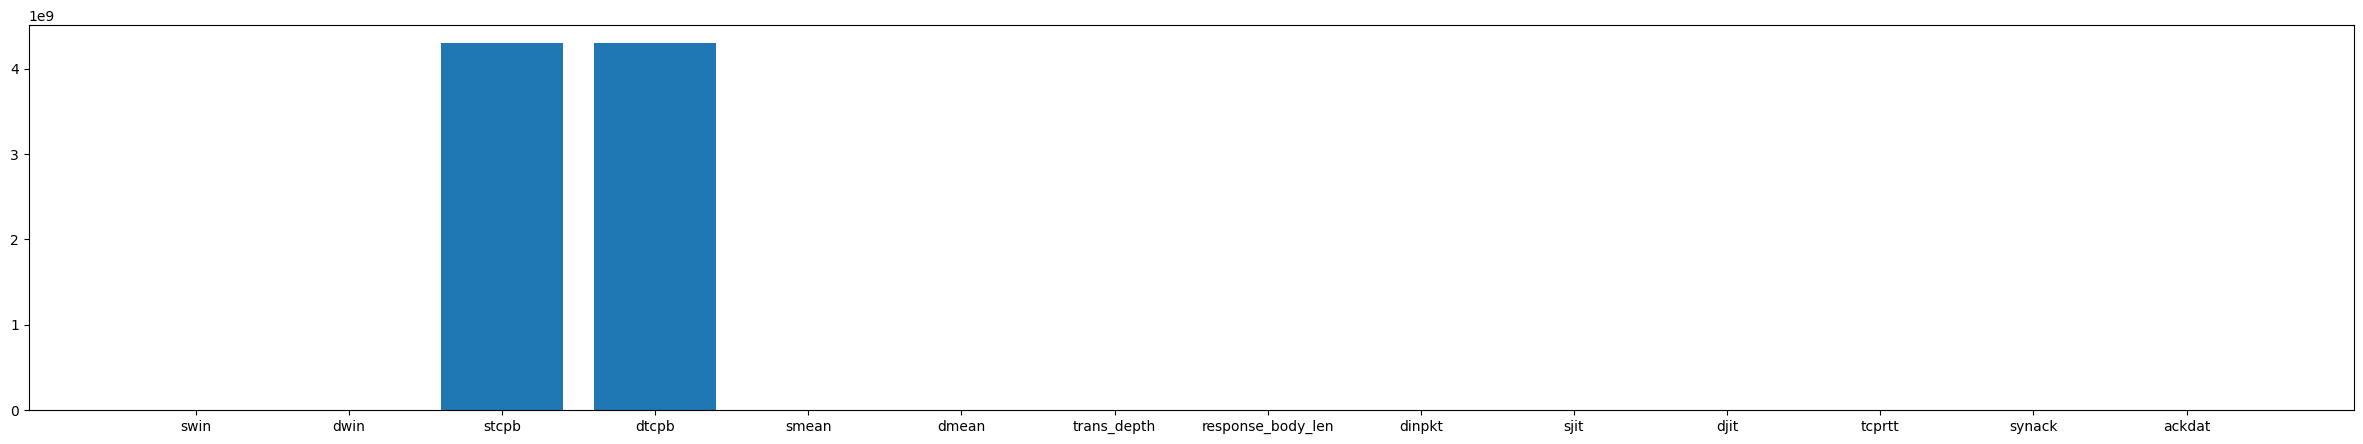

In [19]:
# Plot maximum value of each feature in the pre-normalized data
# x values: feature names, y values: maximum values of each feature
plt.figure(figsize=(30,5))
plt.bar(features, training[features].max())

<BarContainer object of 14 artists>

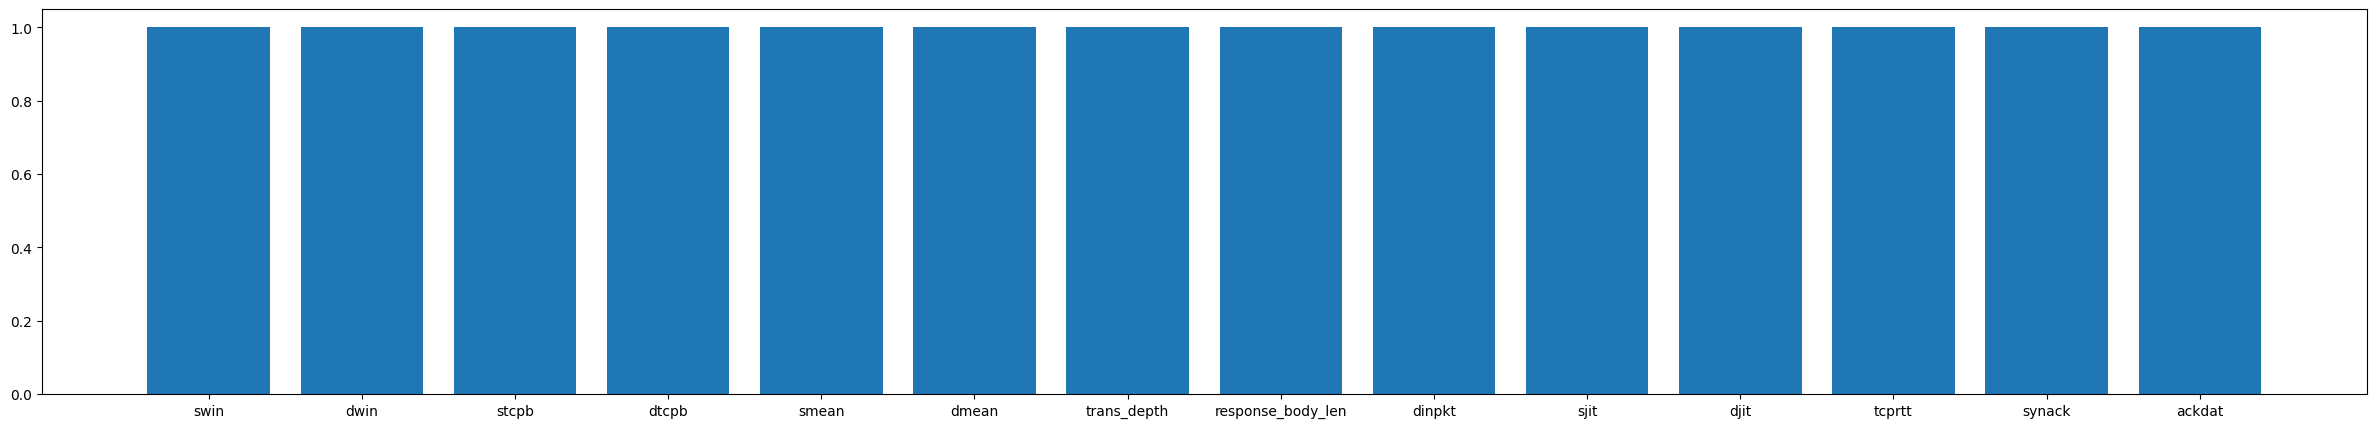

In [20]:
# Perform Normalization on the features in the dataset
training_min_max_scaled = training.copy()
testing_min_max_scaled = testing.copy()

for column in features:
    training_min_max_scaled[column] = (training[column] - training[column].min()) / (training[column].max() - training[column].min())
    testing_min_max_scaled[column] = (testing[column] - testing[column].min()) / (testing[column].max() - testing[column].min())

# Plot maximum value of each feature in the normalized data
# x values: feature names, y values: maximum values of each feature
plt.figure(figsize=(30,5))
plt.bar(features, training_min_max_scaled[features].max())


With this concludes preprocessing, as the data is now in a training/ testing set that has been checked for missing values and then normalized. The results will now be output to new CSV files

In [21]:
# Output normalized data to new CSV files
training_min_max_scaled.to_csv('UNSW_NB15_training-set_normalized.csv', index=False)
testing_min_max_scaled.to_csv('UNSW_NB15_testing-set_normalized.csv', index=False)